### <font color='#4285f4'>Preview Disclaimer</font>

**This is a preview launch of a feature for Dataplex.**


This feature is subject to the "Pre-GA Offerings Terms" in the General Service Terms section of the Service Specific Terms. Pre-GA features are available "as is" and might have limited support. For more information, see the launch stage descriptions. We strongly recommend that for this preview you set up or use only non-production projects that are dedicated solely for the purpose of testing the features under this Preview.**


This feature and its API may be changed in backward-incompatible ways and are not subject to any SLA. It is not guaranteed to move forward to Public Preview or General Availability. This feature is intended for testing only and must not be used in production or in critical applications.

### <font color='#4285f4'>Summary</font>

Anomaly detection provides predictive capabilities by monitoring your data within BigQuery tables. Anomaly detection uses historical data from these tables to train AI models and generate results on the most recent data. This enables you to gain insights on trends and anomalies in your data.

Anomaly detection provides the following key features:

+ Aggregate data based on a column, using a specified aggregateWindow (or the table's data frequency if unspecified), and metrics.
+ Train on historical data from BigQuery tables.
+ For the initial run, predict the latest 10 completed time points following aggregation, excluding                                                                                                  any partially aggregated data.
+ In the second and subsequent runs, an incremental data scan begins from the timestamp of the end of the previous scan.
+ A full scan uses the previous prediction cutoff time as its starting point.
+ Optionally, analyze data further using segmentation columns to check for anomalies based on those column values.


You can do anomaly detection and monitor the status of jobs by creating a data quality scan with the data scan API method.


Send your feedback and questions to dp-data-insights@google.com

### <font color='#4285f4'>IAM Roles</font>

You need the following Dataplex permissions to use anomaly detection:
dataplex.datascans.create
dataplex.datascans.get
dataplex.datascans.getData
dataplex.datascans.list
dataplex.datascans.run


Or, grant the [Dataplex DataScan Administrator role](https://cloud.google.com/dataplex/docs/iam-roles#dataplex.dataScanAdmin) to the account.

You will also need to grant the [BigQuery Data Editor role](https://cloud.google.com/bigquery/docs/access-control#bigquery.dataEditor) to the account.

### <font color='#4285f4'>Create a data anomaly scan</font>

Fill in the following configuration information

In [ ]:
# DataScan settings

# ID of the project where the scan is created
project_id = "<>"

# GCP location where the scan should be created
#location = "us-central1"
location = "<>"


# ID for the data scan; please provide a scan ID that has only letters, numbers, or dashes. This cannot be changed after creation.
datascan_id = "sm-ad-data-scan"

# Provide the table to be monitored
# The full path of the BigQuery table that contains the data in the following format //bigquery.googleapis.com/projects/<project>/datasets/<dataset>/tables/<table>
bigquery_source_table_full_path = "//bigquery.googleapis.com/projects/<>/datasets/<>/tables/<>"

# Provide the display name - this is optional
display_name = "sm-ad-data-scan"

# Provide a description for the scan - this is optional
description = "anomaly detection test run"

# Provide a row filter to extract a sample; for example: a_column > 10; this is optional.
row_filter = ""

# Each job validates incremental data; refer https://cloud.google.com/dataplex/docs/auto-data-quality-overview#rule-execution for more
# If not set, the data scan will be full table scan.
incremental_field = "" #Set this for incremental scan

# Provide the schedule for the run; example:"TZ=Etc/GMT+8 30 * * * *"; If not set, the datascan will be on-demand scan
schedule_scan_cron = ""

# Provide the results table.
# Check Export results to BigQuery in https://cloud.google.com/dataplex/docs/auto-data-quality-overview#results for more
# Set this if you want to export the scan results to a bigquery table in the format - //bigquery.googleapis.com/projects/<project>/datasets/<dataset>/tables/<table>
# For example //bigquery.googleapis.com/projects/demo_project/datasets/demo_dataset/tables/demo_table
bigquery_export_table_full_path = "//bigquery.googleapis.com/projects/<>/datasets/<>/tables/anomaly-smart_meter_readings-hour-rolled"

################################################################################
# Email notification - optional;
# refer Send email notification reports in https://cloud.google.com/dataplex/docs/auto-data-quality-overview#monitoring-and-alerting for more.
emails = [] # example ["a@gmail.com", "b@gmail.com"]

# [0, 100]; If set, report will be sent when score threshold is met.
# For example, when threshold is set to 95, when the score is 94%, it will send an email notification.
datascan_score_threhold = ""

# If set to true, report will be sent when a scan job fails.
job_failure_trigger = False

# If set to true, report will be sent when a scan job ends.
job_end_trigger = False
################################################################################

################################################################################
# Anomaly Detection settings
# the following setting will apply to all anomaly detection rules in this datascan.
aggregation_window = "PER_MINUTE" # Choose one from { 'AUTO_FREQUENCY' | 'PER_MINUTE' | 'HOURLY' | 'DAILY' | 'WEEKLY' | 'MONTHLY' | 'QUARTERLY' | 'YEARLY' }

# Intermediate tables
# There are prep tables that are created to train and test the model. Providing a dataset ensures the intermediate tables are included in the intermediate dataset.
# Provide table in the format - //bigquery.googleapis.com/projects/<project>/datasets/<dataset>
# This is optional
intermediate_dataset_full_path = "//bigquery.googleapis.com/projects/<>/datasets/<>"

# Full path of the final result table of the format - //bigquery.googleapis.com/projects/<project>/datasets/<dataset>/tables/<table>
# This is optional
result_table_full_path = ""

# Choose one of the following as aggregation timestamp
timestamp_column = "time_hour_rolled" #a column from the table (Limit to TIMESTAMP, DATE or DATETIME types)

use_partition_column = False #if the table is time partitioned, you can use the partitioned field by setting use_partition_column to true.

use_incremental_column = False #if this is an incremental data scan, you can use incremental column by setting use_incremental_column to true
################################################################################

# Rules for both anomaly detection rules and regular rules. Example:
rules = [

      {
        "data_anomaly_detection": {
          "metrics": [
            "AVG",
            "MAX"
          ],
          "anomaly_probability_threshold": 0.99
        },
        "column": "consumption_hour_rolled",
        "dimension": "ACCURACY"
      }
]
# rules = [] ## add one or more rules from the above examples

#Validate the datascan settings
if not project_id or not location or not datascan_id or not bigquery_source_table_full_path:
  print("STOP!!! project_id, location, datascan_id and bigquery_source_table_full_path are required to create datascan.")

if aggregation_window not in ["AUTO_FREQUENCY", "PER_MINUTE", "HOURLY", "DAILY", "WEEKLY", "MONTHLY", "QUARTERLY", "YEARLY"]:
  print("STOP!!! A valid aggregation_window is required for anomaly detection datascan. It must be one of [AUTO_FREQUENCY, PER_MINUTE, HOURLY, DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY]")

if use_incremental_column and not incremental_field:
  print("STOP!!! use_incremental_column can only set to TRUE when this is an incremental datascan.")

if not timestamp_column and not use_incremental_column and not use_incremental_column:
  print("STOP!!! Anomaly detection datascan must choose one from timestamp_column, use_incremental_column, use_incremental_column")

timestamp_column_is_set = timestamp_column != ""
aggregation_timestamp_set_count = int(timestamp_column_is_set) + int(use_partition_column) + int(use_incremental_column)
if aggregation_timestamp_set_count > 1:
  print("STOP!!! You can only choose one option among timestamp_column, use_partition_column and use_incremental_column")

if use_incremental_column and not incremental_field:
  print("STOP!!! use_incremental_column can only apply on incremental scan. You need to set incremental_field to enable incremental scan.")

if len(rules) == 0:
  print("STOP!!! The rules list must not be empty")


Execute the API to create scan

In [ ]:
import requests
import json
from google.colab import auth

#Generate Data Quality Spec
data_quality_spec = {"rules" : rules}

#Generate Post Scan Actions if set above
if bigquery_export_table_full_path or len(emails) > 0:
  post_scan_actions = {}
  if bigquery_export_table_full_path:
    post_scan_actions["bigquery_export"] = {"results_table": bigquery_export_table_full_path}
  if len(emails) > 0:
    notification_report = {"recipients": {"emails": emails}}
    if datascan_score_threhold:
      notification_report["score_threshold_trigger"] = {"score_threshold": datascan_score_threhold}
    if job_failure_trigger:
      notification_report["job_failure_trigger"] = {}
    if job_end_trigger:
      notification_report["job_end_trigger"] = {}
    post_scan_actions["notification_report"] = notification_report
  data_quality_spec["post_scan_actions"] = post_scan_actions

#Generate Anomaly Detection Spec
anomaly_detection_spec = {"aggregation_window" : aggregation_window}
if intermediate_dataset_full_path or result_table_full_path:
  anomaly_detection_bigquery_export = {}
  if intermediate_dataset_full_path:
    anomaly_detection_bigquery_export["intermediate_dataset"] = intermediate_dataset_full_path
  if result_table_full_path:
    anomaly_detection_bigquery_export["result_table"] = result_table_full_path
anomaly_detection_spec["bigquery_export"] = anomaly_detection_bigquery_export
if timestamp_column:
  anomaly_detection_spec["timestamp_column"] = timestamp_column
elif use_partition_column:
  anomaly_detection_spec["use_partition_column"] = use_partition_column
elif use_incremental_column:
  anomaly_detection_spec["use_incremental_column"] = use_partition_column
data_quality_spec["anomaly_detection"] = anomaly_detection_spec


#Generate Execution Spec
execution_spec = {}
if schedule_scan_cron:
  execution_spec["trigger"] = {"schedule": {"cron": schedule_scan_cron}}
else:
  execution_spec["trigger"] = {"on_demand": {}}
if incremental_field:
  execution_spec["field"] = incremental_field

#Generate Datascan
datascan = {"data": {
    "resource": bigquery_source_table_full_path
    },
    "data_quality_spec": data_quality_spec,
    "execution_spec": execution_spec,
    "type": "DATA_QUALITY",
}
if row_filter:
  datascan["row_filter"] = row_filter

print("Generated Datascan: ")
print(datascan)

#Start creating datascan
api_url = f"https://dataplex.googleapis.com/v1/projects/{project_id}/locations/{location}/dataScans?dataScanId={datascan_id}"

# Get the authentication token
# This retrieves the access token from your authenticated gcloud session
gcloud_access_token = !gcloud auth print-access-token
access_token = gcloud_access_token[0].strip()

# Set up headers for the request
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {access_token}"
}

# Make the POST request
print(f"Creating Dataplex DataScan: {datascan_id}")
try:
    response = requests.post(api_url, headers=headers, data=json.dumps(datascan))

    # Check the response
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

    operation_response = response.json()
    print("Dataplex DataScan creation initiated (Long Running Operation):")
    print(json.dumps(operation_response, indent=2))

except requests.exceptions.HTTPError as e:
    print(f"HTTP Error creating Dataplex DataScan: {e}")
    print(f"Response content: {response.text}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### <font color='#4285f4'>Runnning an on demand data scan</font>

For on-demand datascan, you can either run it from gcp console, or run this code block.

In [ ]:
# Start Running datascan
run_datascan_url = f"https://dataplex.googleapis.com/v1/projects/{project_id}/locations/{location}/dataScans/{datascan_id}:run"

# Get the authentication token
# This retrieves the access token from your authenticated gcloud session
gcloud_access_token = !gcloud auth print-access-token
access_token = gcloud_access_token[0].strip()

# Set up headers for the request
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {access_token}"
}
payload = {"name": f"projects/{project_id}/locations/{location}/dataScans/{datascan_id}"}

# Make the POST request
print(f"Attempting to run Dataplex DataScan: {datascan_id}")
try:
    response = requests.post(run_datascan_url, headers=headers, data=json.dumps(payload))

    # Check the response
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

    operation_response = response.json()
    print("Dataplex DataScan run initiated (Long Running Operation):")
    print(json.dumps(operation_response, indent=2))

except requests.exceptions.HTTPError as e:
    print(f"HTTP Error running Dataplex DataScan: {e}")
    print(f"Response content: {response.text}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### <font color='#4285f4'>Get a data scan</font>

You can either get the datascan from console, or running this code block

In [ ]:


# Start Running datascan
get_datascan_url = f"https://dataplex.googleapis.com/v1/projects/{project_id}/locations/{location}/dataScans/{datascan_id}?view=full"

# Get the authentication token
# This retrieves the access token from your authenticated gcloud session
gcloud_access_token = !gcloud auth print-access-token
access_token = gcloud_access_token[0].strip()

# Set up headers for the request
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {access_token}"
}
# Make the Get request
print(f"Attempting to get Dataplex DataScan: {datascan_id}")
try:
    response = requests.get(get_datascan_url, headers=headers)

    # Check the response
    response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

    operation_response = response.json()
    print("Dataplex DataScan run initiated (Long Running Operation):")
    print(json.dumps(operation_response, indent=2))

except requests.exceptions.HTTPError as e:
    print(f"HTTP Error running Dataplex DataScan: {e}")
    print(f"Response content: {response.text}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

### <font color='#4285f4'>Appendix</font>

Intermediate Table  
The intermediate table stores the aggregated data. Its naming format is source_table_name_datascan_id. Each data scan has one intermediate table.  
The data_scan_job_id is the same as the job_id that is triggered when the data scan starts running.  

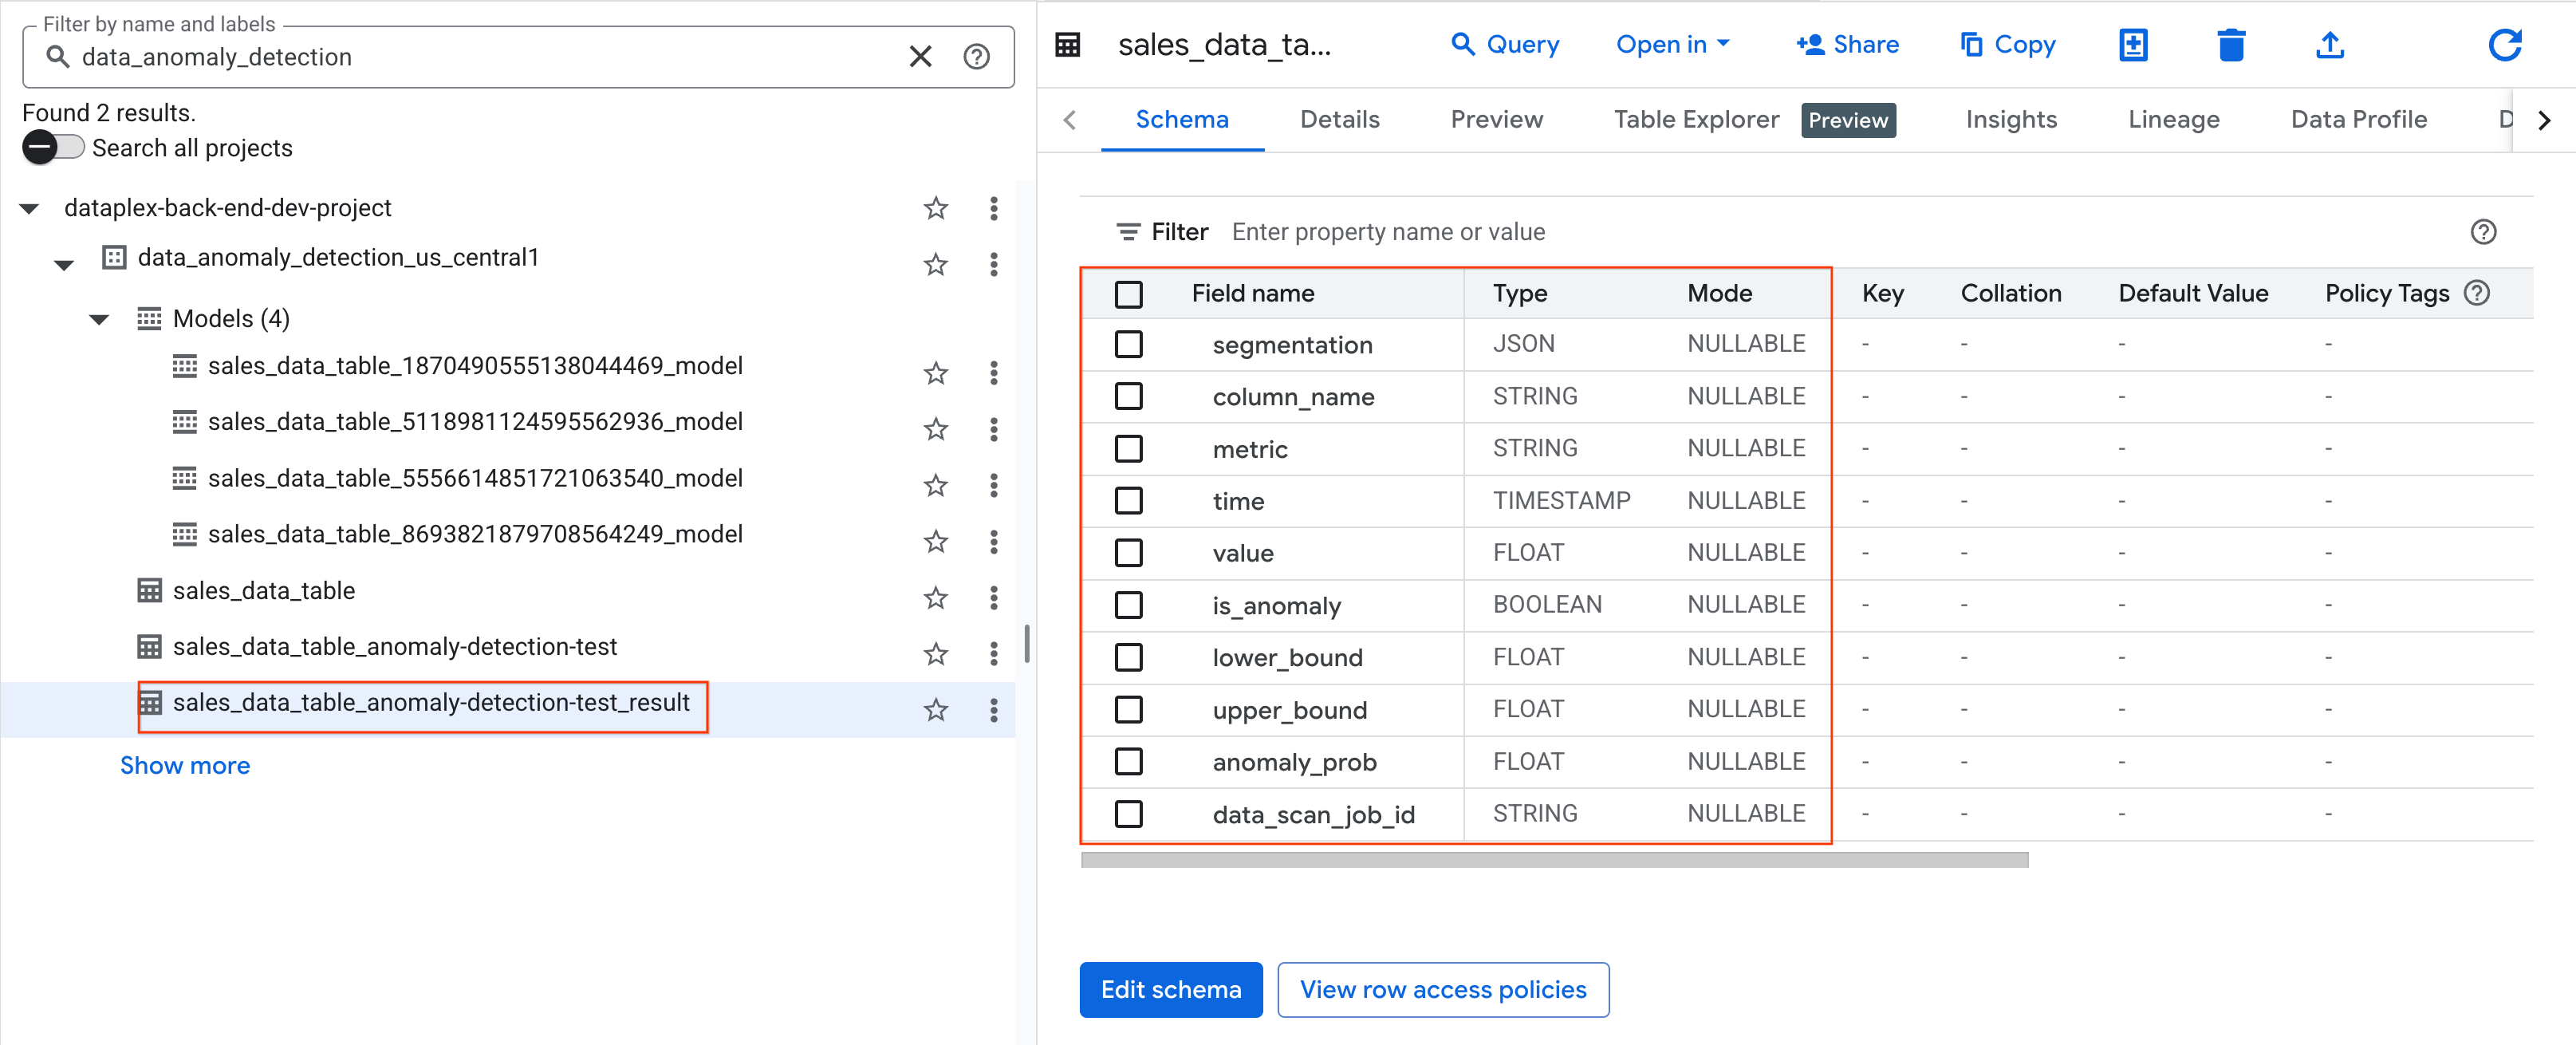  
The aggregated data without segmentation columns.  
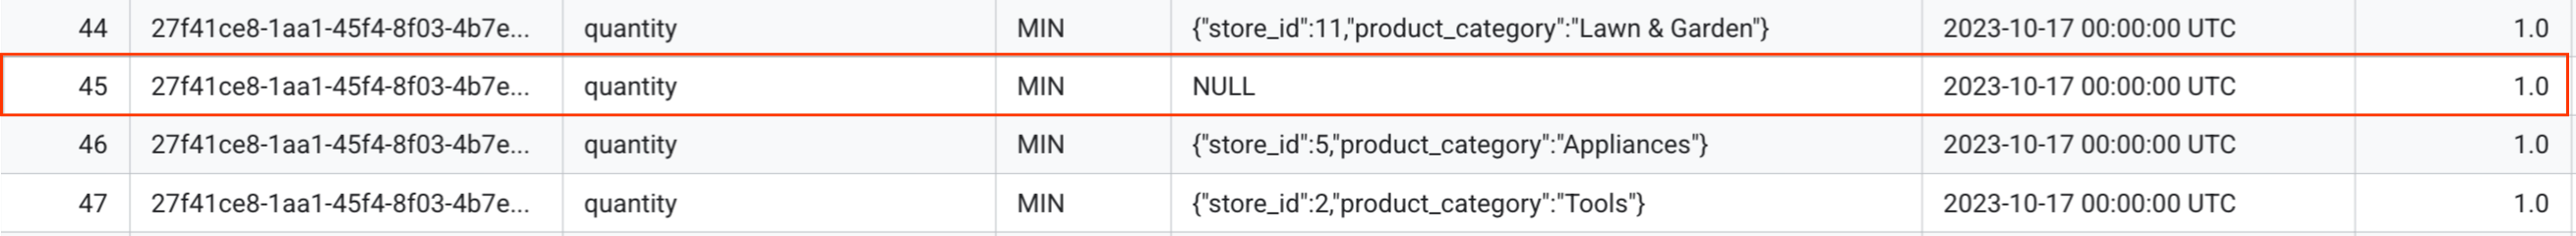  
The aggregated data with segmentation columns.  
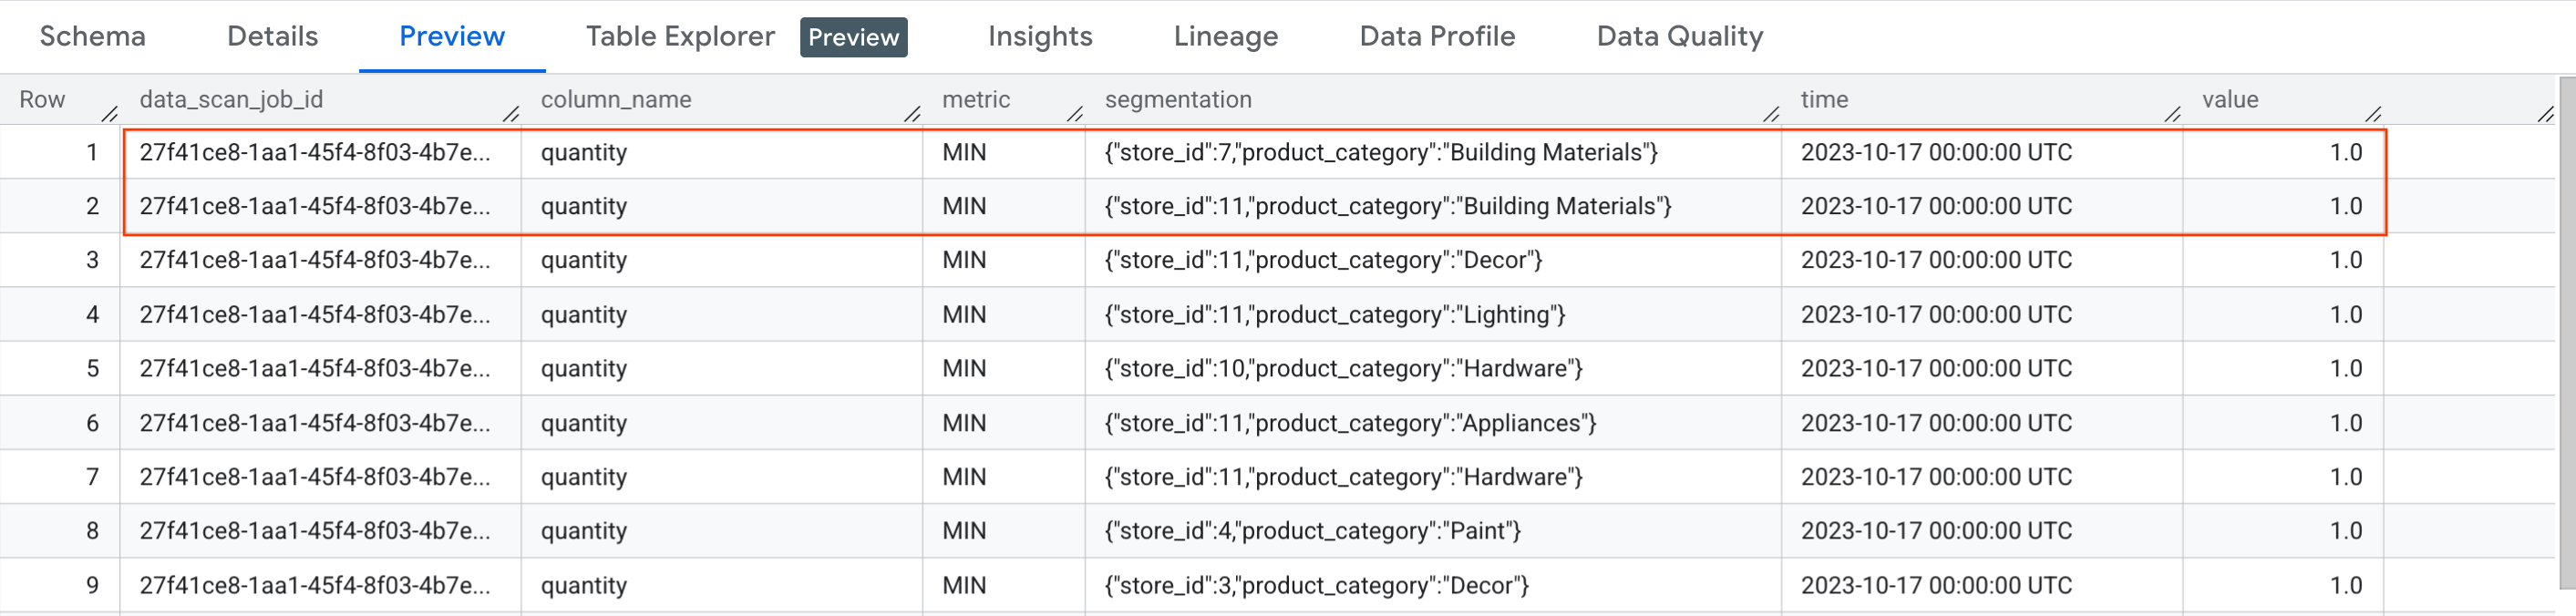


Model  
Each anomaly detection rule has one model. The naming format is data_scan_name_source_table_name_encoded_name_model.  
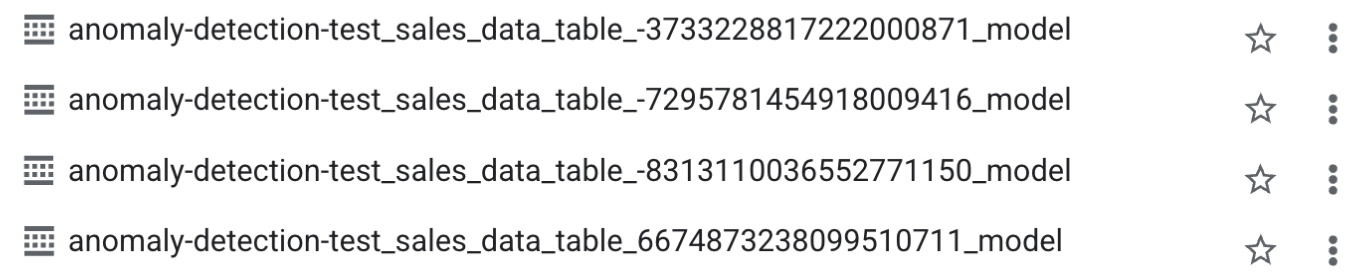


Result Table  
All anomaly detection rule results are written to a results table. You can get more information about the analyzed data by reviewing the results table.  
If the result_table field is set, the data scan creates the table according to that field.  
If not specified, the results table is created in the same dataset as the source table, with the naming format source_table_name_datascan_id_final.  
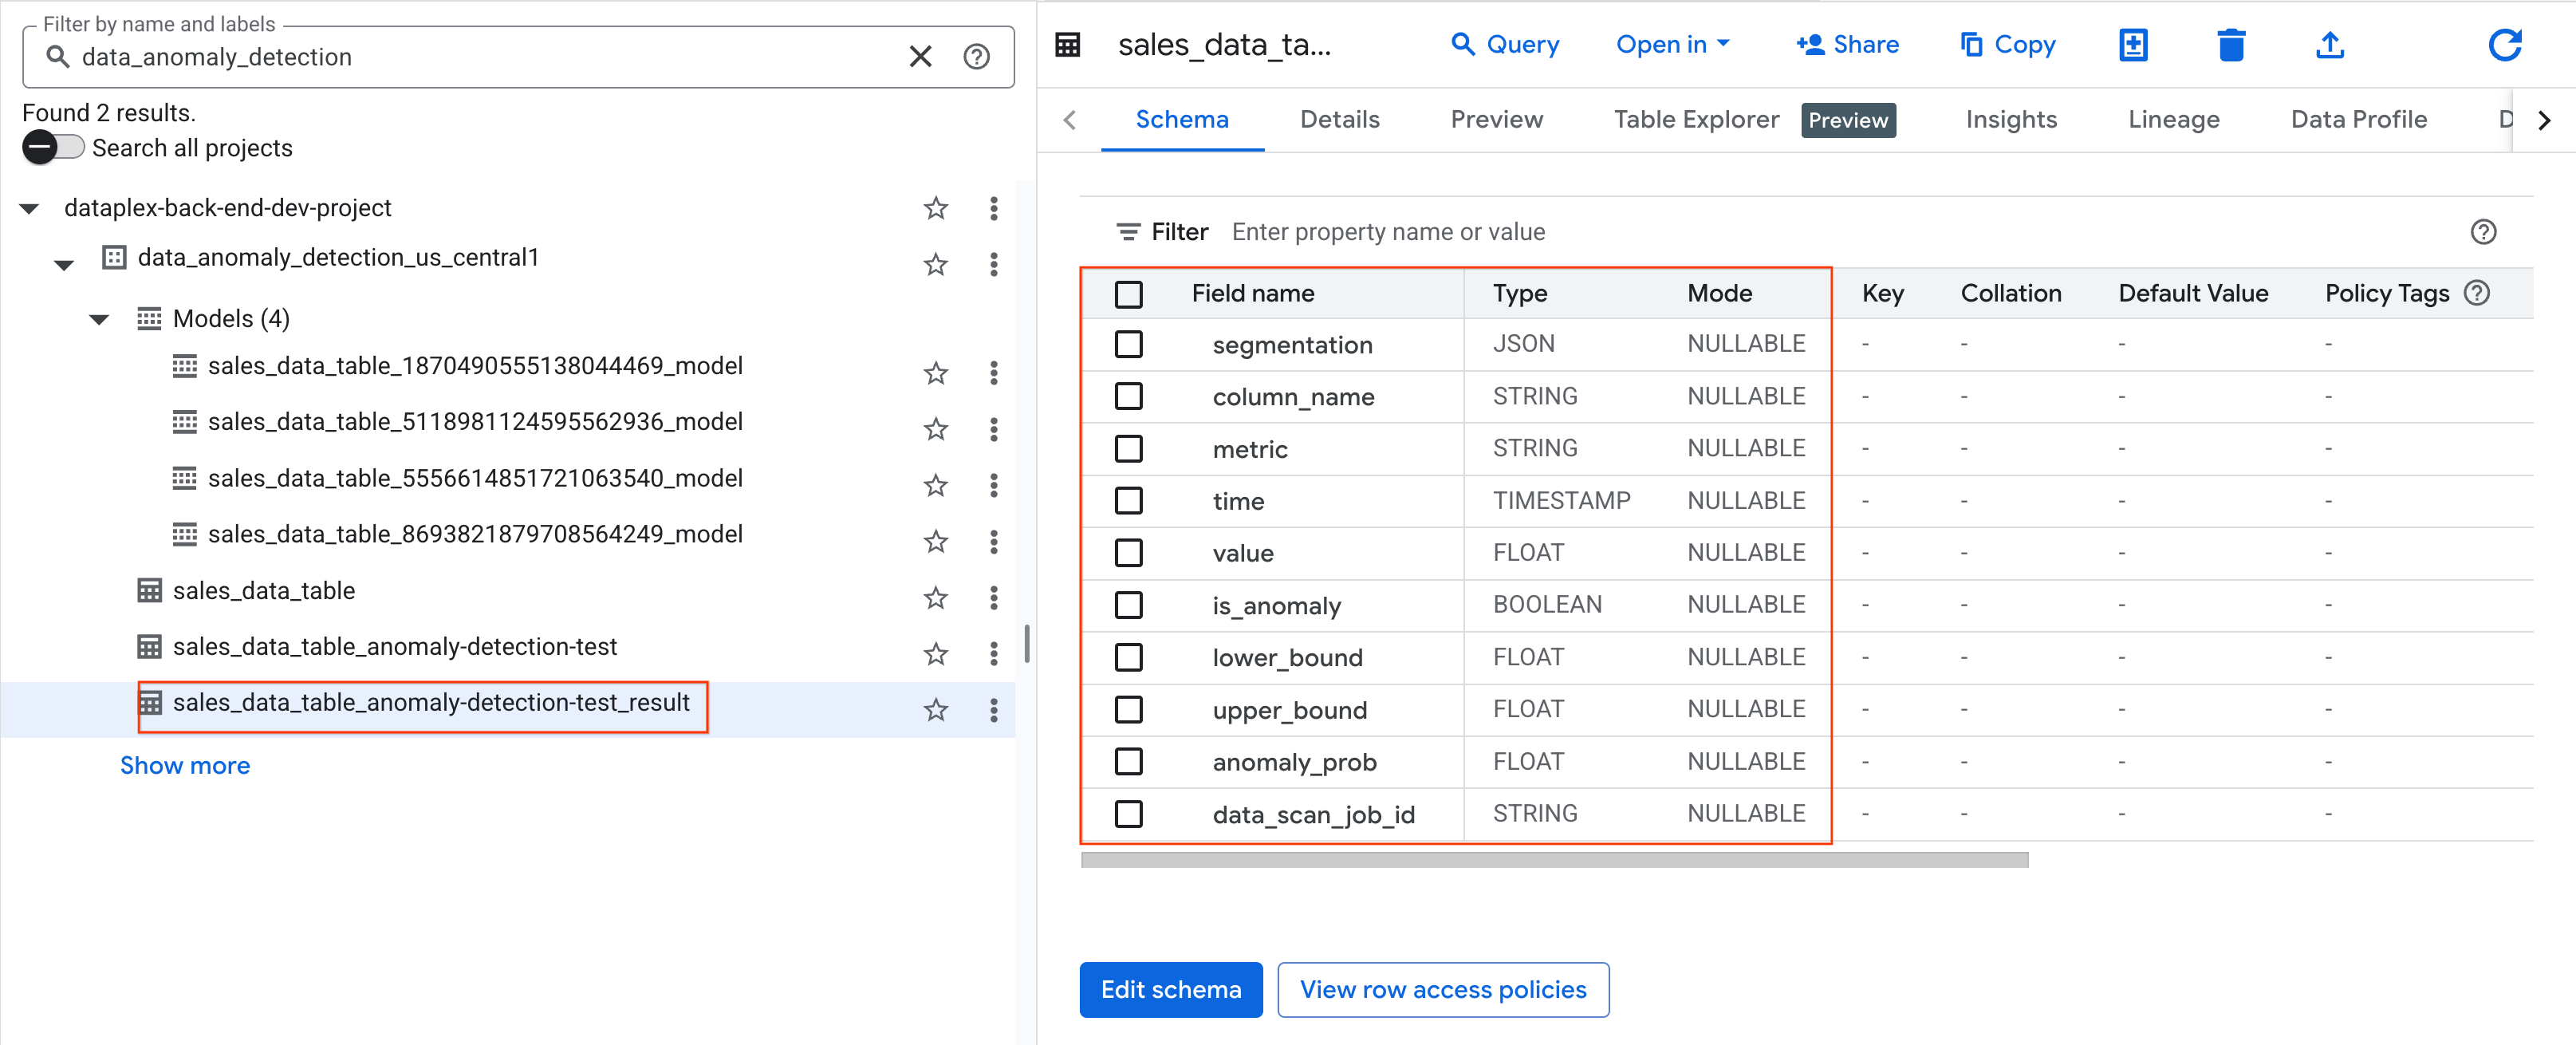  
The predicted data without segmentation columns:
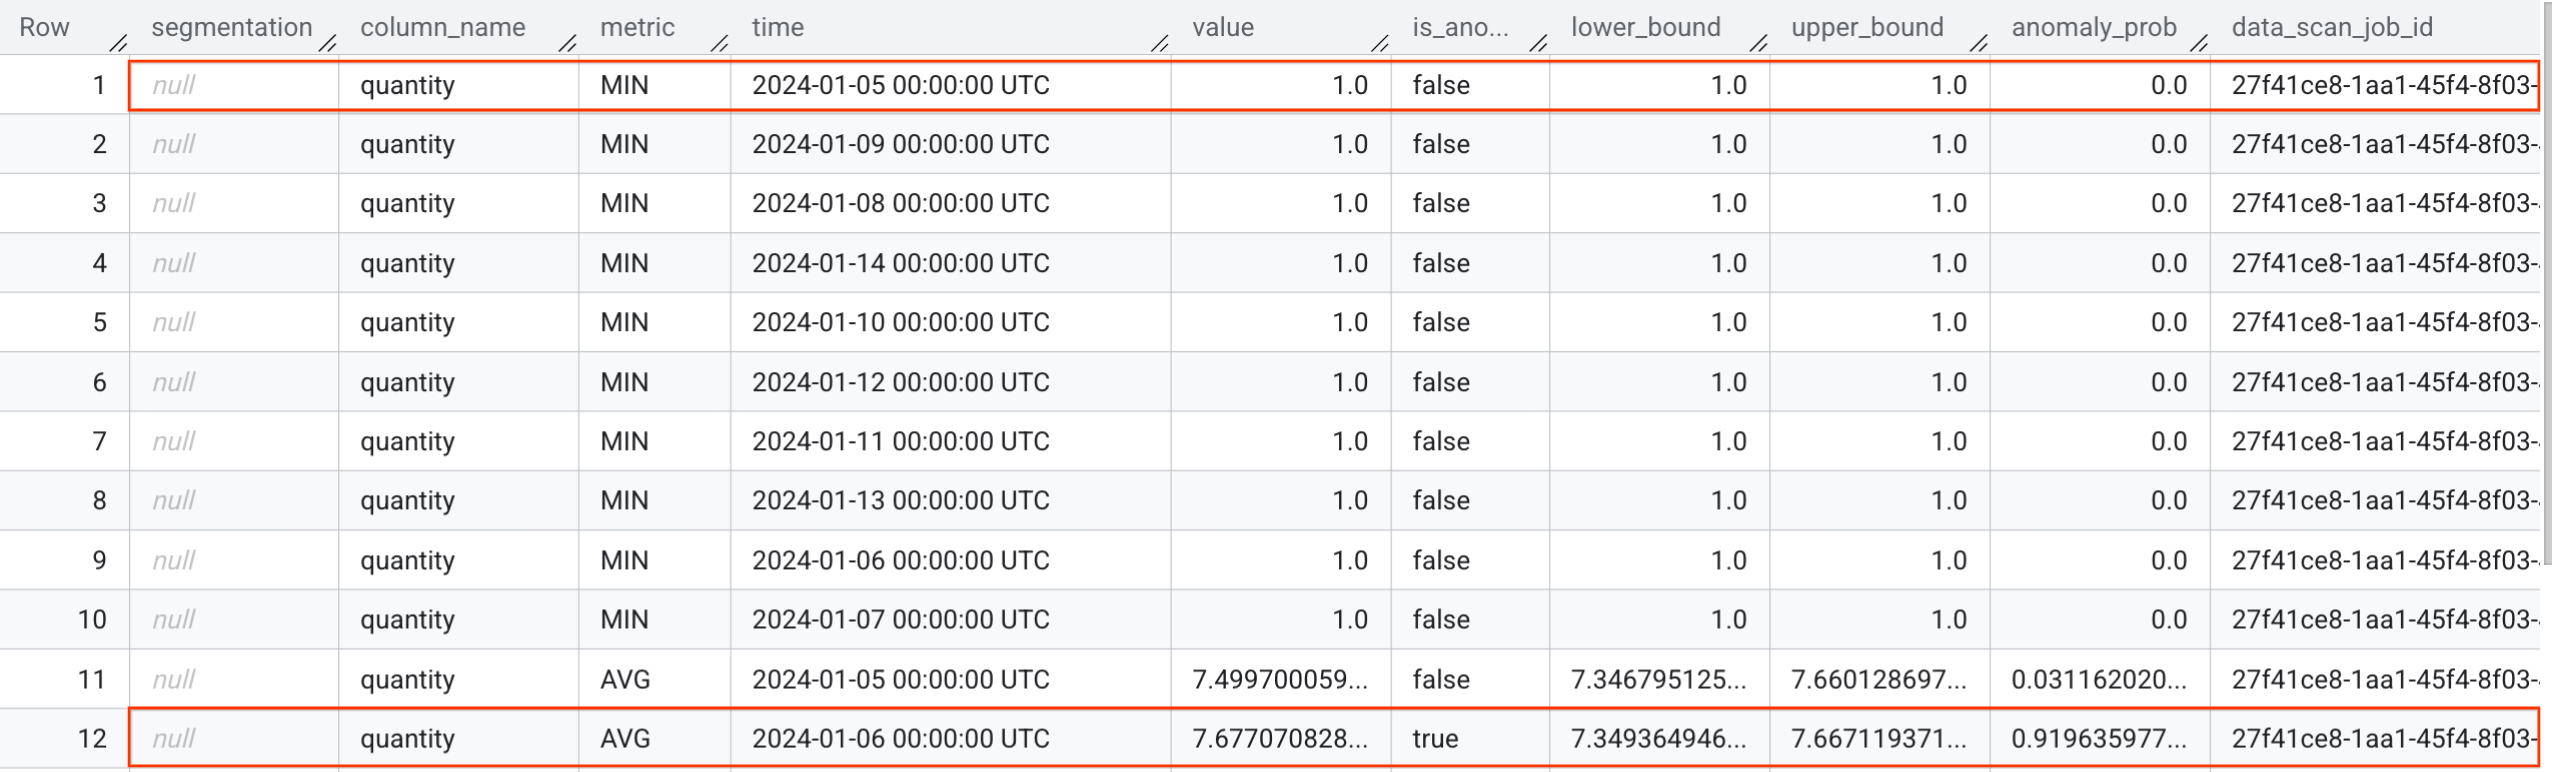
The predicted data with segmentation columns:
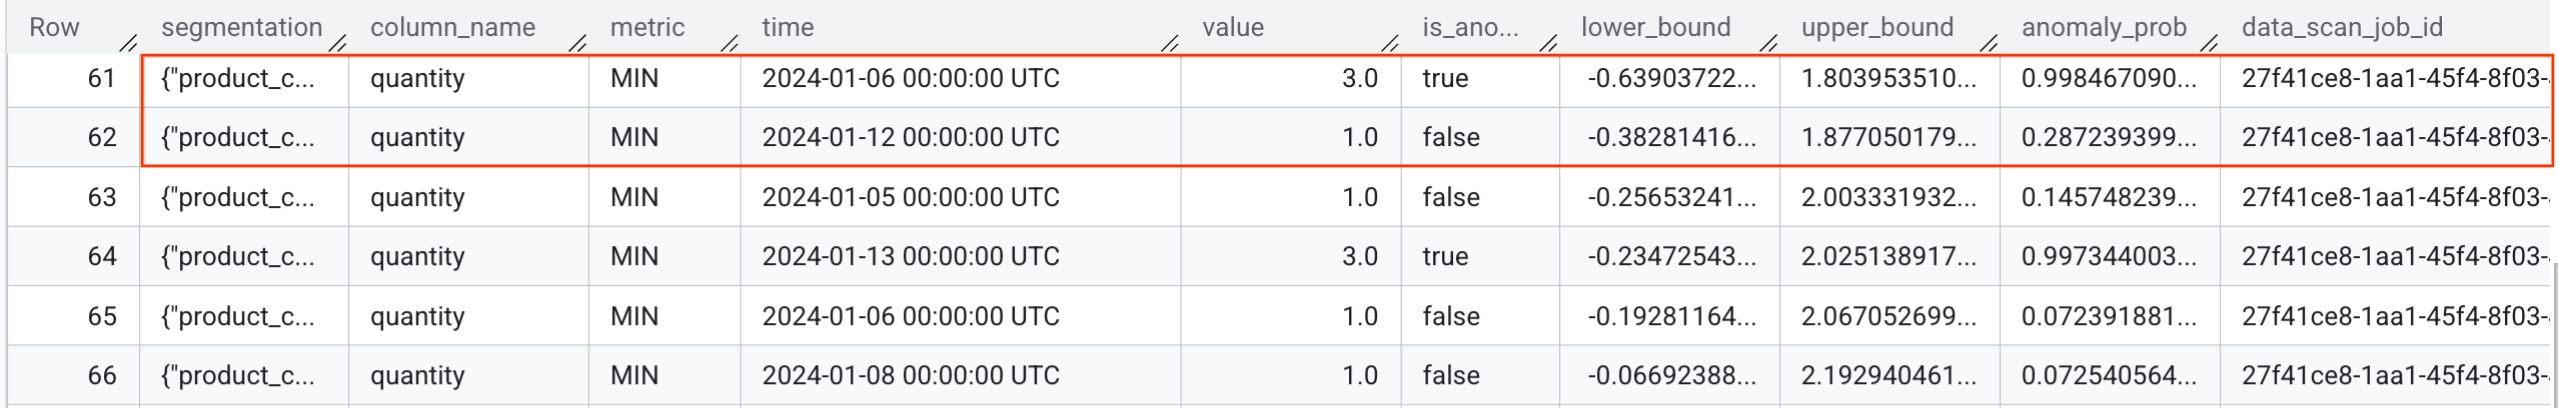
